<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/Optimization_WinterSchool2022_IITGoa_ACM/blob/main/WSOO_Optimization_Introductory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large\textbf{Welcome to Optimization Session}$  

$\large\textbf{Illustrating optimization for some simple functions: }$

We start with a generic optimization problem: 

$
\begin{align}
\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x}).
\end{align}
$

Note that we have considered a $\large{\text{minimization problem}}$ here, which would be relevant to some ML applications. 

We call the function $f(\mathbf{x})$ as the $\large{\text{objective function}}$. 

We call the variable $\mathbf{x}$ as the $\large{\text{decision variable}}$ or $\large{\text{optimization variable}}$. 

The set from which the decision variable arises is called $\large{\text{feasible set}}$. In our case, ${\mathbb{R}}^n$, the $n$-dimensional Euclidean space is the feasible set. 

Suppose if our problem had been of the form 

$
\begin{align}
\min_{\mathbf{x}} & \ f(\mathbf{x}) \\ 
\text{s.t.} & \ x \in \mathcal{C}
\end{align}
$

then $\mathcal{C}$ is called the feasible set. Usually constraints define the feasible set. Typically $\mathcal{C}$ is assumed to be a subset of some high dimensional Euclidean space. 

___



$\large{\text{Example:}}$ Consider the problem $\textbf{(P1)}$:

$
\begin{align}
\min_{ x_1 \in {\mathbb{R}},  x_2 \in {\mathbb{R}}} (1-x_1^4) + (x_2-3)^2  + 3x_1 x_2.   
\end{align}
$

#Exercise:

Find the feasible set in problem $\textbf{(P1)}$. 

___

$\large{\text{Example:}}$ Consider the problem $\textbf{(P2)}$:

$
\begin{align}
\min_{ x_1 \in {\mathbb{R}},  x_2 \in {\mathbb{R}}} & (1-x_1^4) + (x_2-3)^2  + 3x_1 x_2, \\
\text{s.t.} & x_1 - x_2 \geq 0, x_1x_2^2  \leq 5.    
\end{align}
$

#Exercise:

Find the feasible set in problem $\textbf{(P2)}$.
___ 

$\large{\text{Example:}}$ Consider the least squares minimization problem observed in linear regression.

Given a training set $\{(x^i,y^i)\}_{i=1}^{n}$ where $x^i \in {\mathbb{R}}^d, y^i \in {\mathbb{R}}$, $\forall i \in  \{1,2,\ldots,n\}$, we solve: 

$
\begin{align}
\min_{\beta \in {\mathbb{R}}^d, c \in \mathbb{R}}  & \ \frac{1}{2n} \sum_{i=1}^{n} (y^i - (\beta^\top x^i + c))^2  
\end{align}
$

#Exercise:

Find the feasible set in least squares minimization problem. 

___

$\large{\text{Example:}}$ Consider the SVM optimization problem.

Given a training set $\{(x^i,y^i)\}_{i=1}^{n}$ where $x^i \in {\mathbb{R}}^d, y^i \in \{+1,-1\}$, $\forall i \in  \{1,2,\ldots,n\}$, we solve: 

$
\begin{align}
\min_{w \in {\mathbb{R}}^d,b\in \mathbb{R}, {\xi_i} \in {\mathbb{R}}  } & \ \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i
\\ 
\text{s.t.} & \ y^i (w^\top x^i + b) \geq 1-\xi_i \ \forall i \in \{1,2,\ldots,n\} \text{ and } \\ 
& \ \xi_i \geq 0 \ \forall i \in \{1,2,\ldots,n\}. 
\end{align}
$

#Exercise:

Find the feasible set in SVM optimization problem. 
___

#Types of minimizers

We shall see some examples first. 

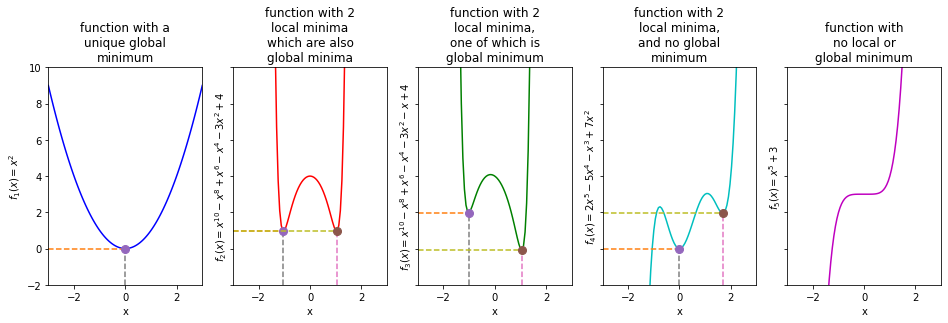

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

x = np.linspace(-3,3,100)

func_ = [x**2, x**10- x**8+ x**6-x**4-3*x**2+4, x**10- x**8+ x**6-x**4-3*x**2-x+4, 2*x**5-5*x**4-x**3+7*x**2 , x**5+3]

fig, ax = plt.subplots(1,5,sharey=True,figsize=(16, 4))
#print(ax.shape)

colors = ['b','r','g','c','m']

marker_colors= ['tab:purple','tab:brown']
line_colors = ['tab:gray', 'tab:orange', 'tab:pink', 'tab:olive']

fn_desc = ['$f_1(x) = x^2$', '$f_2(x) = x^{10}- x^8+ x^6-x^4-3x^2+4$', '$f_3(x) = x^{10}- x^8+ x^6-x^4-3x^2-x+4$', '$f_4(x) = 2x^5-5x^4-x^3+7x^2$', '$f_5(x)=x^5+3$']

titles = ["function with a unique global minimum",
          "function with 2 local minima which are also global minima",
          "function with 2 local minima, one of which is global minimum",
          "function with 2 local minima, and no global minimum",
          "function with no local or global minimum"]

f_x_star_1 = [0,-1.036,-1.02,0]
f_y_star_1 = [0,0.9618,1.99,0]

f_x_star_2 = [0,1.036,1.05,1.685]
f_y_star_2 = [0,0.9618,-0.0815,1.9507]

fn_ = []
x_left = -3
y_down = -2

for i in range(5):
  ax[i].plot(x,func_[i],color=colors[i])
  #fn_[i].append(f)
  ax[i].set_xlabel('x')
  ax[i].set_ylim(-2,10)
  ax[i].set_xlim(-3,3)
  ax[i].set_ylabel(fn_desc[i])
  if i<=3: 
    #plot line indicating the optimal decision variable x* on x-axis 
    ax[i].plot([f_x_star_1[i], f_x_star_1[i]], [y_down, f_y_star_1[i]], linestyle='dashed', color=line_colors[0]) 

    #plot line indicating the optimal function value y* on y-axis
    ax[i].plot([x_left, f_x_star_1[i]], [f_y_star_1[i], f_y_star_1[i]], linestyle='dashed',color=line_colors[1]) 

    #plot the optimal (x*,f(x*)) point on the graph
    ax[i].plot([f_x_star_1[i]], [f_y_star_1[i]], marker='o', markersize=8, color=marker_colors[0]) 
  if i>=1 and i<=3:
    #plot line indicating the optimal decision variable x* on x-axis 
    ax[i].plot([f_x_star_2[i], f_x_star_2[i]], [y_down, f_y_star_2[i]], linestyle='dashed', color=line_colors[2]) 

    #plot line indicating the optimal function value y* on y-axis
    ax[i].plot([x_left, f_x_star_2[i]], [f_y_star_2[i], f_y_star_2[i]], linestyle='dashed',color=line_colors[3]) 

    #plot the optimal (x*,f_1(x*)) point on the graph
    ax[i].plot([f_x_star_2[i]], [f_y_star_2[i]], marker='o', markersize=8, color=marker_colors[1]) 

  ax[i].set_title("\n".join(wrap(titles[i],15)))

plt.show()


$\textbf{Global minimum}$ 

Consider a function $f:\mathbb{R}^n\to \mathbb{R}$. A point $\tilde{\mathbf{x}} \in {\mathbb{R}}^n$ is a global minimum point (or a global minimizer) of function $f$ if $f(\tilde{\mathbf{x}}) \leq f(\mathbf{x}), \ \forall \mathbf{x} \in {\mathbb{R}}^n$.   

$\textbf{Strict Global minimum}$ 

Consider a function $f:\mathbb{R}^n\to \mathbb{R}$. A point $\tilde{\mathbf{x}} \in {\mathbb{R}}^n$ is a strict global minimum point (or a strict global minimizer) of function $f$ if $f(\tilde{\mathbf{x}}) < f(\mathbf{x}), \ \forall \mathbf{x}  \in {\mathbb{R}}^n \text{ such that } \mathbf{x} \neq \tilde{\mathbf{x}}$.

___


Before we discuss about the idea of local minimum, we describe about the notion of neighborhood around a point. To discuss this, we require distance to be defined between two points. 

#Distance metric in ${\mathbb{R}}^n$

Consider the set ${\mathbb{R}}^n$. The distance between two points $\mathbf{x}=(x_1,x_2,\ldots,x_n)$ and $\mathbf{y}=(y_1,y_2,\ldots,y_n)$ in  ${\mathbb{R}}^n$ is computed as $d(\mathbf{x},\mathbf{y})$. 

Well-known examples of distance $d(\mathbf{x},\mathbf{y})$ are as follows. 


*   $L_2$ distance or Euclidean distance: $d(\mathbf{x},\mathbf{y}) = \sum\limits_{i=1}^{n} (x_i-y_i)^2$. 
*   $L_1$ distance or Manhattan distance or City-block distance: $d(\mathbf{x},\mathbf{y}) = \sum\limits_{i=1}^{n} |x_i-y_i|$.
*   $L_\infty$ distance or Chebychev distance: $d(\mathbf{x},\mathbf{y}) = \max\limits_{i=1,2,\ldots,n} |x_i-y_i|$.
*   $L_p$ distance or Minkowski distance: $d(\mathbf{x},\mathbf{y}) = \left(\sum\limits_{i=1}^{n} (|x_i-y_i|)^p\right )^\frac{1}{p}, \ \forall 1\leq p < \infty$.

Now let us discuss the notion of neighborhood around a point in ${\mathbb{R}}^n$. 

#Neighborhood around a point 

The ${\color{orange}{\text{(open)}}}$ neighborhood $\mathcal{N}(\mathbf{x},\epsilon)$ around a point $\mathbf{x} \in  {\mathbb{R}}^n$ of radius $\epsilon$ is defined as: 

$
\mathcal{N}(\mathbf{x},\epsilon) = \{\mathbf{y} \in {\mathbb{R}}^n: d(\mathbf{x},\mathbf{y}) < \epsilon\}. 
$



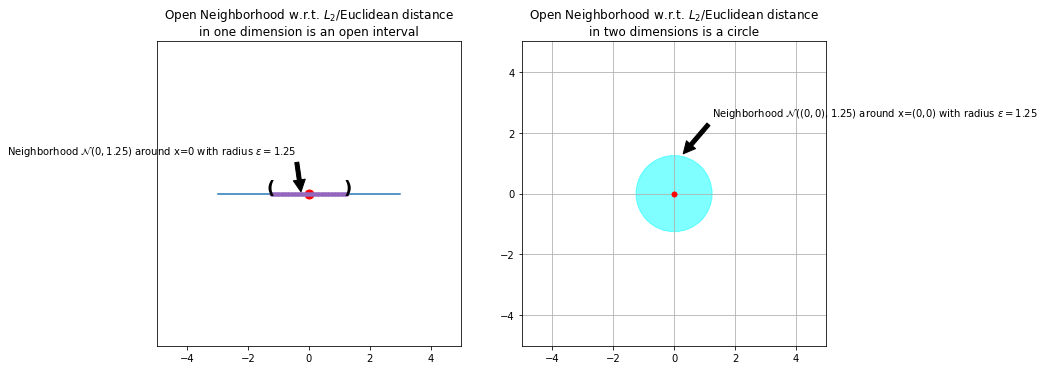

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np 
from textwrap import wrap

x = np.linspace(-3,3,100)
y = 0*x

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].plot(x, y)
ax[0].set_yticks([])

center_x = 0
center_y = 0
ax[0].plot(center_x,center_y, marker='o', markersize=9, color='r') 
ax[0].set_aspect('equal')
ax[0].set_xlim(left=-5,right=5)
ax[0].set_ylim(-5,5)

eps = 1.25
x1 = np.linspace(-eps,eps,100)
y1 = 0*x1
ax[0].plot(x1,y1, marker='o', markersize=3, color='tab:purple') 

ax[0].annotate(')',
            xy=(1.15, -0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('(',
            xy=(-1.4, 0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('Neighborhood $\mathcal{N}(0,1.25)$ around x=0 with radius $\epsilon=1.25$',
            xy=(-0.25, 0), xycoords='data',
            xytext=(-5, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[0].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_2$/Euclidean distance in one dimension is an open interval',50)))

#fig1, ax1 = plt.subplots(1)
#ax1.plot(x, y)
ax[1].add_patch(plt.Circle((0, 0), 1.25, color='#00ffff', alpha=0.5))
ax[1].plot(center_x,center_y, marker='o', markersize=5, color='r') 
#ax1.add_artist(plt.Circle((0, 0), 1.25))
ax[1].set_xlim(left=-5,right=5)
ax[1].set_ylim(-5,5)
ax[1].set_aspect('equal')
ax[1].annotate('Neighborhood $\mathcal{N}((0,0),1.25)$ around x=(0,0) with radius $\epsilon=1.25$',
            xy=(0.25, 1.25), xycoords='data',
            xytext=(30, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

ax[1].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_2$/Euclidean distance in two dimensions is a circle',50)))
ax[1].grid()
#ax[1].set_title('Open Neighborhood w.r.t. $L_2$/Euclidean distance in two dimensions is an open ball')

#fig.suptitle('Open Neighborhood with respect to $L_2$/Euclidean Distance', fontsize=30)

plt.show()

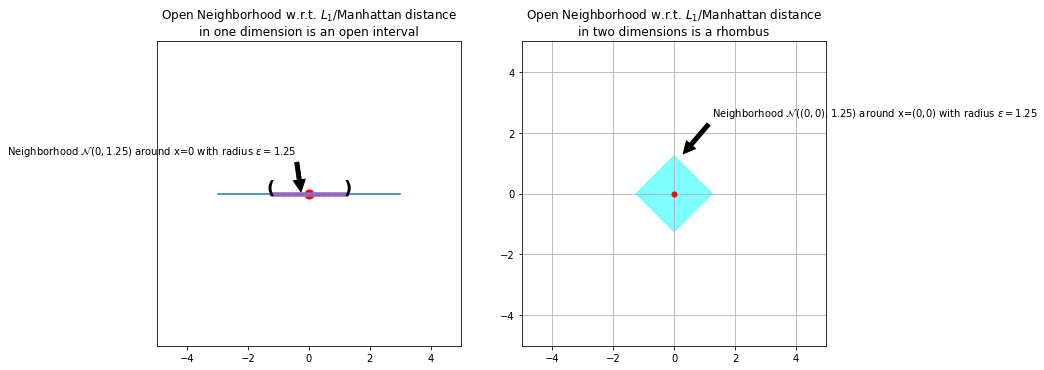

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np 
from textwrap import wrap


x = np.linspace(-3,3,100)
y = 0*x

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].plot(x, y)
ax[0].set_yticks([])

center_x = 0
center_y = 0
ax[0].plot(center_x,center_y, marker='o', markersize=9, color='r') 
ax[0].set_aspect('equal')
ax[0].set_xlim(left=-5,right=5)
ax[0].set_ylim(-5,5)

eps = 1.25
x1 = np.linspace(-eps,eps,100)
y1 = 0*x1
ax[0].plot(x1,y1, marker='o', markersize=3, color='tab:purple') 

ax[0].annotate(')',
            xy=(1.15, -0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('(',
            xy=(-1.4, 0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('Neighborhood $\mathcal{N}(0,1.25)$ around x=0 with radius $\epsilon=1.25$',
            xy=(-0.25, 0), xycoords='data',
            xytext=(-5, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[0].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_1$/Manhattan distance in one dimension is an open interval',50)))

#fig1, ax1 = plt.subplots(1)
#ax1.plot(x, y)
corners = [[-1.25,0], [0,1.25], [1.25,0], [0,-1.25]]

ax[1].add_patch(plt.Polygon(corners, color='#00ffff', alpha=0.5))
ax[1].plot(center_x,center_y, marker='o', markersize=5, color='r') 
#ax1.add_artist(plt.Circle((0, 0), 1.25))
ax[1].set_xlim(left=-5,right=5)
ax[1].set_ylim(-5,5)
ax[1].set_aspect('equal')
ax[1].annotate('Neighborhood $\mathcal{N}((0,0),1.25)$ around x=(0,0) with radius $\epsilon=1.25$',
            xy=(0.25, 1.25), xycoords='data',
            xytext=(30, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

ax[1].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_1$/Manhattan distance in two dimensions is a rhombus',50)))
ax[1].grid()
#ax[1].set_title('Open Neighborhood w.r.t. $L_2$/Euclidean distance in two dimensions is an open ball')

#fig.suptitle('Open Neighborhood with respect to $L_2$/Euclidean Distance', fontsize=30)

plt.show()

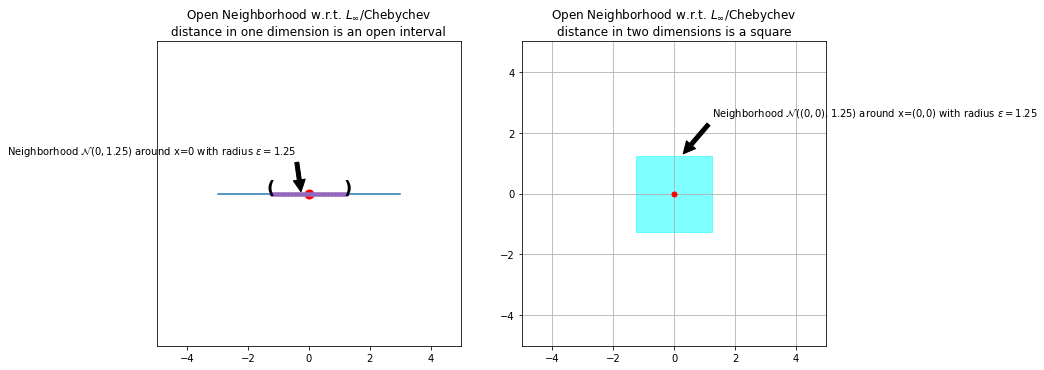

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np 
from textwrap import wrap


x = np.linspace(-3,3,100)
y = 0*x

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].plot(x, y)
ax[0].set_yticks([])

center_x = 0
center_y = 0
ax[0].plot(center_x,center_y, marker='o', markersize=9, color='r') 
ax[0].set_aspect('equal')
ax[0].set_xlim(left=-5,right=5)
ax[0].set_ylim(-5,5)

eps = 1.25
x1 = np.linspace(-eps,eps,100)
y1 = 0*x1
ax[0].plot(x1,y1, marker='o', markersize=3, color='tab:purple') 

ax[0].annotate(')',
            xy=(1.15, -0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('(',
            xy=(-1.4, 0.0), xycoords='data', weight='bold',size=18)

ax[0].annotate('Neighborhood $\mathcal{N}(0,1.25)$ around x=0 with radius $\epsilon=1.25$',
            xy=(-0.25, 0), xycoords='data',
            xytext=(-5, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax[0].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_\infty$/Chebychev distance in one dimension is an open interval',50)))

#fig1, ax1 = plt.subplots(1)
#ax1.plot(x, y)
#corners = [[-1.25,], [0,1.25], [1.25,0], [0,-1.25]]

ax[1].add_patch(plt.Rectangle([-1.25,-1.25], 2.5, 2.5, color='#00ffff', alpha=0.5))
ax[1].plot(center_x,center_y, marker='o', markersize=5, color='r') 
#ax1.add_artist(plt.Circle((0, 0), 1.25))
ax[1].set_xlim(left=-5,right=5)
ax[1].set_ylim(-5,5)
ax[1].set_aspect('equal')
ax[1].annotate('Neighborhood $\mathcal{N}((0,0),1.25)$ around x=(0,0) with radius $\epsilon=1.25$',
            xy=(0.25, 1.25), xycoords='data',
            xytext=(30, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

ax[1].set_title("\n".join(wrap('Open Neighborhood w.r.t. $L_\infty$/Chebychev distance in two dimensions is a square',50)))
ax[1].grid()
#ax[1].set_title('Open Neighborhood w.r.t. $L_2$/Euclidean distance in two dimensions is an open ball')

#fig.suptitle('Open Neighborhood with respect to $L_2$/Euclidean Distance', fontsize=30)

plt.show()

In [ ]:
#@title
# import numpy as np
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go

# #Code inspired from https://mimmackk.github.io/unitball/

# def generate_coord(p, center, radius, num_steps):
#     # mesh grid in polar coordinates 
#     theta = np.linspace(0, np.pi * 2, num_steps)
#     phi   = np.linspace(0, np.pi,     num_steps)

#     theta, phi = np.meshgrid(theta, phi)

#     rho = lambda x : (np.abs(np.sin(x))**p + np.abs(np.cos(x))**p)**(-1/p)
#     #rho_numerator = lambda x :  (radius*(np.sin(x))**p + (1-radius)*(np.abs(np.cos(x)))**p)**(1/p)

#     # Generate Cartesian points
#     x = np.sin(phi) * rho(phi) * np.cos(theta) * rho(theta) + center[0]
#     y = np.sin(phi) * rho(phi) * np.sin(theta) * rho(theta) + center[1]
#     z = np.cos(phi) * rho(phi)  + center[2]

#     x = radius**(1/p)*x
#     y = radius**(1/p)*y
#     z = radius**(1/p)*z
    
#     return (x, y, z)


# p = 2
# num_steps = 100
# center = np.array([0,0,0])
# radius = 2.

# X, Y, Z = generate_coord(p, center, radius, num_steps)
# fig = go.Figure(go.Surface(x=X,y=Y,z=Z,colorscale='Viridis',showscale=False))
# #fig.set_title()
# fig.update_layout(showlegend=False)

$\textbf{Local minimum}$ 

Consider a function $f:\mathbb{R}^n\to \mathbb{R}$. A point $\tilde{\mathbf{x}} \in {\mathbb{R}}^n$ is a local minimum point (or a local minimizer) of function $f$ if $f(\tilde{\mathbf{x}}) \leq f(\mathbf{x}), \ \forall \mathbf{x} \in \mathcal{N}(\mathbf{x}, \epsilon) \subseteq {\mathbb{R}}^n$ for some $\epsilon>0$.   

${\color{red}{\textbf{Note:}}}$ The minimality of $\tilde{\mathbf{x}}$ is only over a small neighborhood $\mathcal{N}(\mathbf{x}, \epsilon)$ around the point $\tilde{\mathbf{x}}$. 

$\textbf{Strict Local minimum}$ 

Consider a function $f:\mathbb{R}^n\to \mathbb{R}$. A point $\tilde{\mathbf{x}} \in {\mathbb{R}}^n$ is a strict global minimum point (or a strict global minimizer) of function $f$ if $f(\tilde{\mathbf{x}}) < f(\mathbf{x}), \ \forall \mathbf{x}  \in \mathcal{N}(\mathbf{x}, \epsilon) \subseteq {\mathbb{R}}^n \text{ for some } \epsilon>0 \text{ such that } \mathbf{x} \neq \tilde{\mathbf{x}}$.

___


#Question 

##Does the problem  $\min\limits_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ always have a minimizer? 



#Question 

#When does the problem $\min\limits_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ have a solution? 

#Existence of a minimizer of a function $f$ 

#(A result due to Weierstrass)

Let $f$ be a ${\color{magenta}{\text{continuous}}}$ function defined over a ${\color{blue}{\text{closed}}}$ and ${\color{purple}{\text{bounded}}}$ (or compact) subset $\mathcal{C}$ of ${\mathbb{R}}^n$. Then there exists a global minimizer of $f$ over $\mathcal{C}$. 

___


$\Large{\text{What do we require to solve }}$ $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ $\Large{\text{?}}$

___